In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from time import time
import datetime
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline

In [10]:
#打开数据文件
d33=pd.read_csv('E:/yadian.csv')  #读取数据集
#遍历 格式设置为float
traffic_feature=d33[['取向因子y','取向因子x','PZT体积分数','通道因子z','界面平行因子']]
traffic_target=d33['d33']
#scaler = StandardScaler() # 标准化转换
#scaler.fit(traffic_feature)  # 训练标准化对象
#traffic_feature= scaler.transform(traffic_feature)   # 转换数据集
feature_train,feature_test,target_train, target_test = train_test_split(traffic_feature,traffic_target,test_size=0.2,random_state=201)

In [16]:
clf = make_pipeline(StandardScaler(), SVR(kernel="rbf",gamma=0.756259622283275,C=85))
#clf=SVR(kernel="rbf",gamma=0.26826957952797276,C=100)
clf.fit(feature_train,target_train)
predict_results1=clf.predict(feature_test)
r_squared = r2_score(target_test,predict_results1 )
print(r_squared)

0.9333059261084119


0.756259622283275 1.3257113655901108e-09


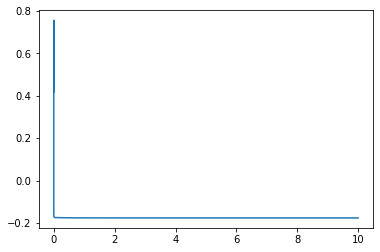

In [14]:
score = []
gamma_range = np.logspace(-10, 1, 50)
for i in gamma_range:
    clf = SVR(kernel="rbf", gamma=i).fit(feature_train,target_train)
    score.append(clf.score(feature_test, target_test))
print(max(score), gamma_range[score.index(max(score))])
plt.plot(gamma_range, score)
plt.show()    #对rbg  核函数进行调参

0.024344231537624106 84.85424242424243


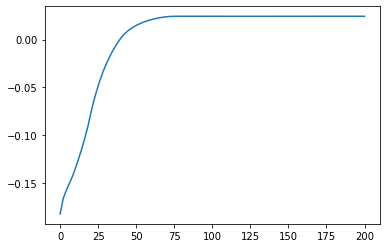

In [8]:
score = []
C_range = np.linspace(0.01, 200, 100)
for i in C_range:
    clf = SVR(kernel="rbf", C=i, gamma=0.0127).fit(feature_train,target_train)
    score.append(clf.score(feature_test, target_test))
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range, score)
plt.show()     #调参

In [ ]:
score = []
C_range = np.linspace(0.01, 30, 50)
for i in C_range:
    clf = SVR(kernel="linear",C=i).fit(feature_train,target_train)
    score.append(clf.score(feature_test, target_test))
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range, score)
plt.show()